<a href="https://colab.research.google.com/github/Jean-yun/Aiffel_project/blob/main/%5BMission_2%5DOnline_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install koreanize-matplotlib --qq
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [6]:
# Ï£ºÎ¨∏ ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [7]:
# Ï£ºÎ¨∏ Ï∑®ÏÜå Í±¥ Ï†úÏô∏
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [8]:
# Ï£ºÎ¨∏ Í∞ÄÍ≤©
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom            12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom            12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [9]:
df.describe()

Quantity      UnitPrice     CustomerID   InvoiceMonth  \
count  530104.000000  530104.000000  397884.000000  530104.000000   
mean       10.542037       3.907625   15294.422852       7.560611   
std       155.524124      35.915681    1713.141602       3.508496   
min         1.000000       0.001000   12346.000000       1.000000   
25%         1.000000       1.250000   13969.000000       5.000000   
50%         3.000000       2.080000   15159.000000       8.000000   
75%        10.000000       4.130000   16795.000000      11.000000   
max     80995.000000   13541.330000   18287.000000      12.000000   

          TotalPrice  
count  530104.000000  
mean       20.121871  
std       270.356743  
min         0.001000  
25%         3.750000  
50%         9.900000  
75%        17.700000  
max    168469.600000

In [10]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω

df["Country"] = df["Country"].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## ÎØ∏ÏÖò1) Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌïú Íµ¨Ï≤¥Ï†ÅÏù∏ Î∂ÑÏÑùÏùÑ Îã§ÏùåÏùò ÏàúÏÑúÎ°ú ÏßÑÌñâÌï¥ Ï£ºÏÑ∏Ïöî.

Ïã¨Ïä®Ïùò Ïó≠ÏÑ§(Simpson's Paradox)ÏùÄ ÌÜµÍ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Ìï¥ÏÑùÌï† Îïå Î∞úÏÉùÌï† Ïàò ÏûàÎäî ÌòÑÏÉÅÏúºÎ°ú, ÏùºÎ∂Ä ÌïòÏúÑ Í∑∏Î£πÏóêÏÑú Í¥ÄÏ∞∞Îêú Ï∂îÏÑ∏Í∞Ä Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥§ÏùÑ Îïå Î∞òÏ†ÑÎê† Ïàò ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. Ïù¥ ÌòÑÏÉÅÏùÄ Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïòÏúÑ Í∑∏Î£π Í∞ÑÏóê ÏÉÅÏù¥Ìïú Î∂ÑÌè¨ÎÇò ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.

Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî, Îç∞Ïù¥ÌÑ∞ ÎÇ¥ÏóêÏÑú ÏÑúÎ°ú ÏÉÅÎ∞òÎêú Ï∂îÏÑ∏Î•º Î≥¥Ïù¥Îäî ÌïòÏúÑ Í∑∏Î£πÏùÑ Ï∞æÍ±∞ÎÇò ÏÉùÏÑ±Ìï¥Ïïº Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, ÌäπÏ†ï ÏÉÅÌíàÏùò ÌåêÎß§ÎüâÏù¥ÎÇò Îã®Í∞ÄÍ∞Ä Íµ≠Í∞ÄÎ≥ÑÎ°ú Îã§Î•∏ Ï∂îÏÑ∏Î•º Î≥¥Ïù¥ÎäîÏßÄ, ÌòπÏùÄ ÌäπÏ†ï Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌåêÎß§ Ï∂îÏÑ∏Í∞Ä Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò Ï∂îÏÑ∏ÏôÄ Îã§Î•∏ÏßÄ Îì±ÏùÑ Î∂ÑÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.

Îç∞Ïù¥ÌÑ∞Î•º Ï†úÏãúÌïú ÌäπÏ†ï Íµ≠Í∞ÄÎ°ú ÌïòÏúÑ Í∑∏Î£πÏúºÎ°ú ÎÇòÎàïÎãàÎã§.
Í∞Å ÌïòÏúÑ Í∑∏Î£πÏóêÏÑú Ï¥ù ÌåêÎß§Í∏àÏï°Ïùò Ï∂îÏÑ∏Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ ÎèôÏùºÌïú ÏßÄÌëúÎ•º Î∂ÑÏÑùÌï©ÎãàÎã§.
ÌïòÏúÑ Í∑∏Î£πÏùò Ï∂îÏÑ∏ÏôÄ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Ï∂îÏÑ∏Í∞Ä ÏÑúÎ°ú Îã§Î•∏ Î∞©Ìñ•ÏÑ±ÏùÑ Î≥¥Ïùº Í≤ΩÏö∞, Ïù¥Î•º ÌÜµÌï¥ Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ÏùÑ ÏÑ§Î™ÖÌï©ÎãàÎã§.
Ïù¥Îü¨Ìïú Î∂ÑÏÑùÏùÑ ÏúÑÌï¥, Îç∞Ïù¥ÌÑ∞ ÎÇ¥ÏóêÏÑú Ï†ÅÏ†àÌïú Î≥ÄÏàòÏôÄ ÌïòÏúÑ Í∑∏Î£πÏùÑ ÏÑ†Ï†ïÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§. ÌòÑÏû¨ Ï†úÍ≥µÎêú Îç∞Ïù¥ÌÑ∞ÎßåÏúºÎ°úÎäî Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ÏùÑ Î∞îÎ°ú ÏÑ§Î™ÖÌï† Ïàò ÏûàÎäî Î™ÖÌôïÌïú ÏòàÏãúÎ•º Ï∞æÍ∏∞ Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Î•º ÍπäÏù¥ Î∂ÑÏÑùÌïòÎ©¥ Í¥ÄÎ†® ÌòÑÏÉÅÏùÑ Î∞úÍ≤¨Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
Îã§Ïùå Íµ≠Í∞ÄÏóê ÎåÄÌï¥ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Íµ¨ÌïòÍ≥† seaborn Ïùò lmplotÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏãúÍ∞ÅÌôî ÌïòÍ≥† Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÎäîÏßÄ Î∂ÑÏÑùÌï¥ Ï£ºÏÑ∏Ïöî.
Îòê, Ïù¥Î•º ÎπÑÏ¶àÎãàÏä§Ïóê Ïñ¥ÎñªÍ≤å ÌôúÏö©Ìï† Ïàò ÏûàÏùÑÏßÄÎèÑ ÏÑ§Î™ÖÌï¥ Ï£ºÏÑ∏Ïöî.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* Ïä¨ÎùºÏù¥Îìú ÏûêÎ£åÏóêÏÑú "Ïã¨Ïä®Ïùò Ïó≠ÏÑ§"ÏùÑ Ï∞æÏïÑÏ£ºÏÑ∏Ïöî.

In [12]:
df['StockCode'].value_counts()

85123A    2265
85099B    2112
22423     2017
47566     1706
20725     1595
          ... 
85098B       0
84546        0
84526        0
85110        0
84726        0
Name: StockCode, Length: 4070, dtype: int64

<Axes: xlabel='Country', ylabel='TotalPrice'>

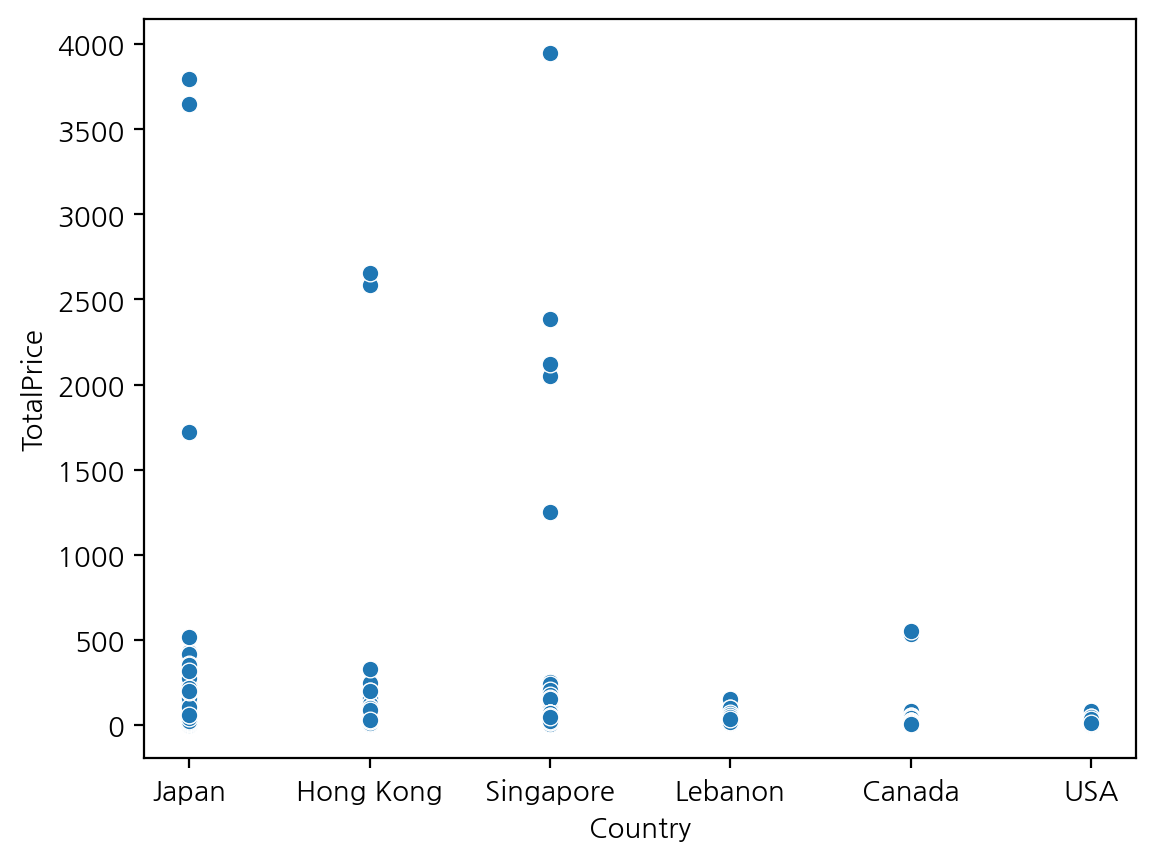

In [13]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

#ÌïòÏúÑÍ∑∏Î£π ÏÑ§Ï†ïÌï¥Ï£ºÍ∏∞
country_sub = df[df['Country'].isin(country_group)]

#Íµ≠Í∞ÄÎ≥Ñ Ï¥ùÍ∏àÏï°Ïùò Î∂ÑÌè¨ ÌôïÏù∏
sns.scatterplot(data=country_sub, y='TotalPrice', x='Country')


In [14]:
country_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 9783 to 524436
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     1202 non-null   category      
 1   StockCode     1202 non-null   category      
 2   Description   1202 non-null   category      
 3   Quantity      1202 non-null   int32         
 4   InvoiceDate   1202 non-null   datetime64[ns]
 5   UnitPrice     1202 non-null   float64       
 6   CustomerID    918 non-null    float32       
 7   Country       1202 non-null   object        
 8   InvoiceMonth  1202 non-null   int64         
 9   TotalPrice    1202 non-null   float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='Country', ylabel='Quantity'>

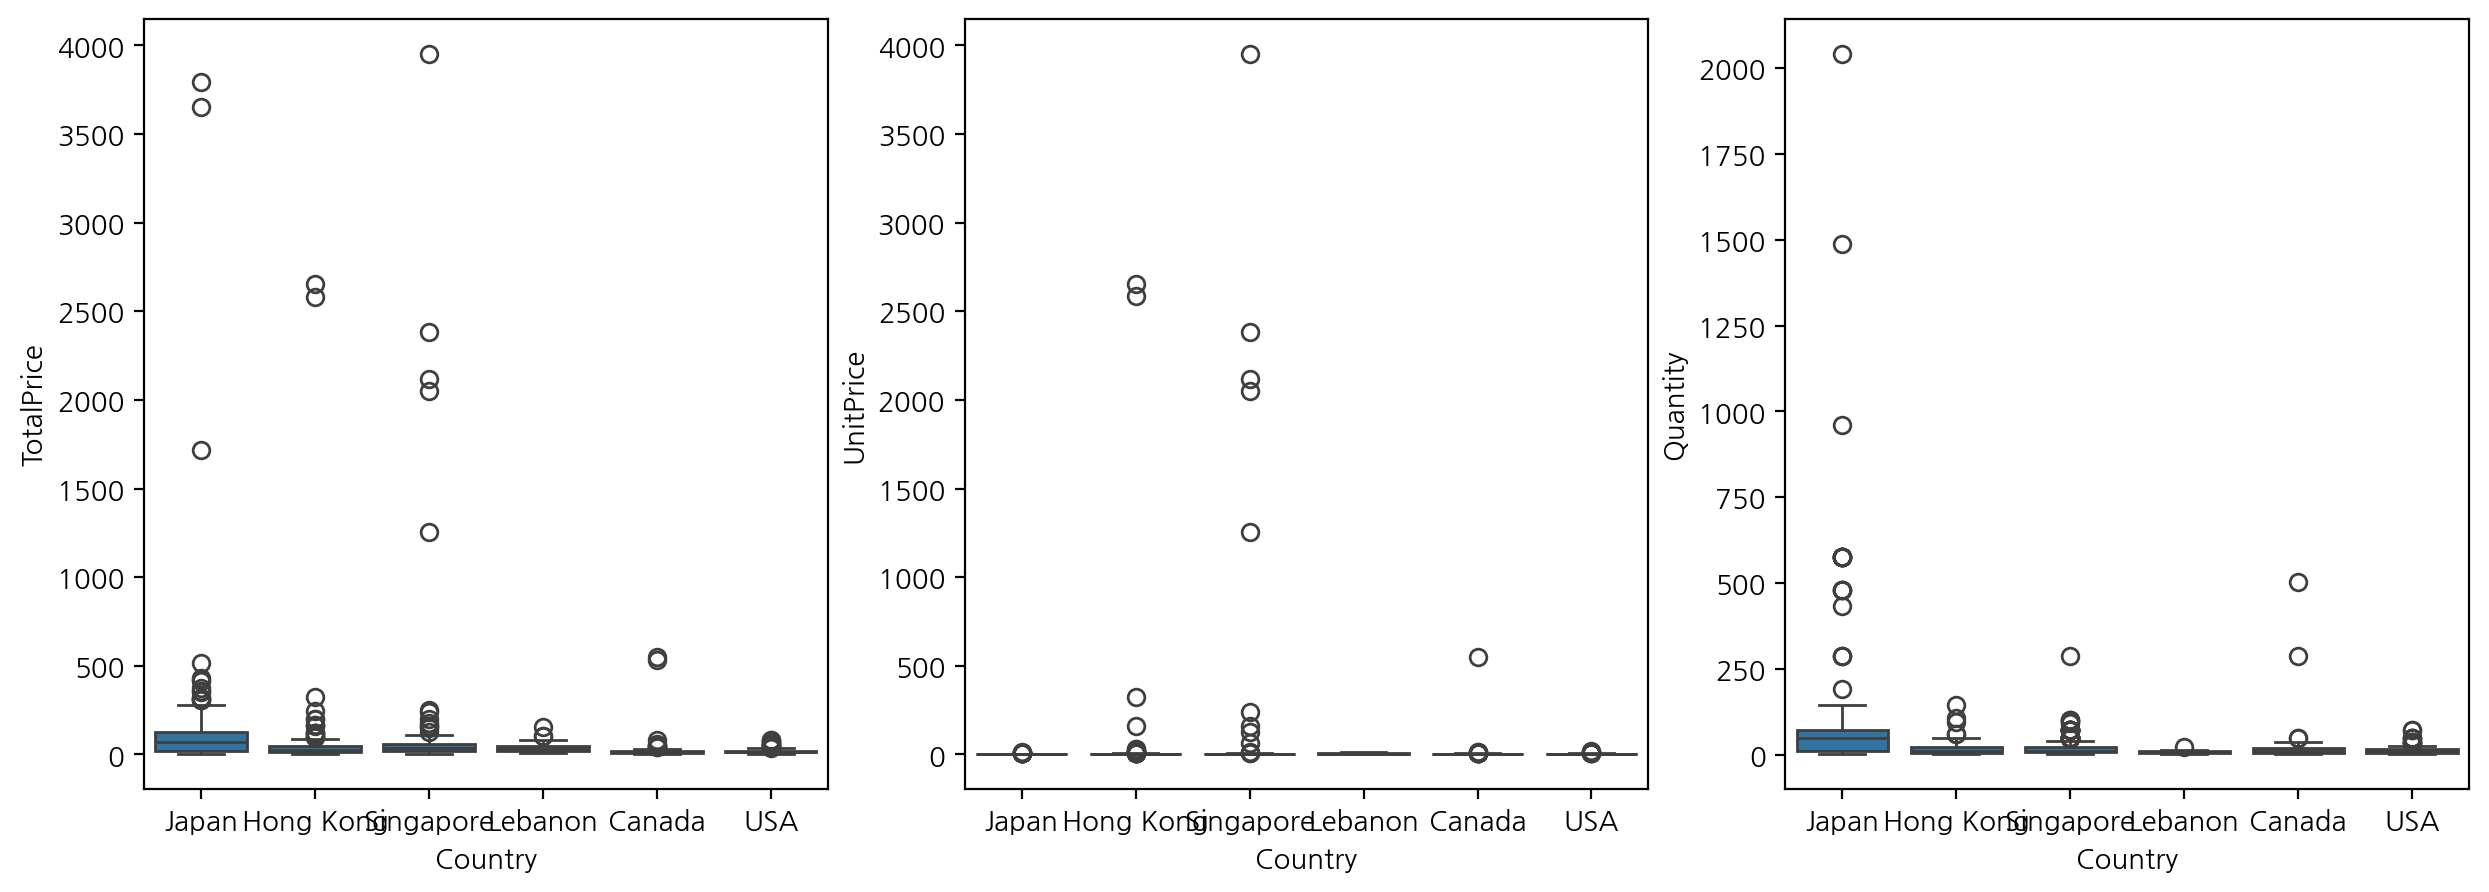

In [15]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=country_sub, y='TotalPrice', x='Country', ax=axes[0])
sns.boxplot(data=country_sub, y='UnitPrice', x='Country', ax=axes[1])
sns.boxplot(data=country_sub, y='Quantity', x='Country', ax=axes[2])

In [16]:
#Ïù¥ÏÉÅÏπò Ï†úÍ±∞
def outlier_remove(data, column, threshold=3):
  z_score = np.abs(data[column]- np.mean(data[column])) / np.std(data[column])
  filtered_data = data[z_score < threshold]
  return pd.DataFrame(filtered_data)


In [17]:
country_sub = outlier_remove(country_sub, 'TotalPrice')
country_sub = outlier_remove(country_sub, 'Quantity')
country_sub = outlier_remove(country_sub, 'UnitPrice')
country_sub

InvoiceNo StockCode                          Description  Quantity  \
9783      537218     85016        SET OF 6 VINTAGE NOTELETS KIT         6   
9784      537218     21506           FANCY FONT BIRTHDAY CARD,         12   
9785      537218     22716                   CARD CIRCUS PARADE        12   
9786      537218     22983                  CARD BILLBOARD FONT        12   
9787      537218     22030               SWALLOWS GREETING CARD        12   
...          ...       ...                                  ...       ...   
524432    580553     20675                   BLUE POLKADOT BOWL        16   
524433    580553     20676                   RED RETROSPOT BOWL        16   
524434    580553     20975  12 PENCILS SMALL TUBE RED RETROSPOT        72   
524435    580553     22083            PAPER CHAIN KIT RETROSPOT        12   
524436    580553     21240                    BLUE POLKADOT CUP        16   

               InvoiceDate  UnitPrice  CustomerID Country  InvoiceMonth  \
9783   2010-12-05 15:46:00       2.55     12763.0   Japan            12   
9784   2010-12-05 15:46:00       0.42     12763.0   Japan            12   
9785   2010-12-05 15:46:00       0.42     12763.0   Japan            12   
9786   2010-12-05 15:46:00       0.42     12763.0   Japan            12   
9787   2010-12-05 15:46:00       0.42     12763.0   Japan            12   
...                    ...        ...         ...     ...           ...   
524432 2011-12-05 10:14:00       1.25     12646.0     USA            12   
524433 2011-12-05 10:14:00       1.25     12646.0     USA            12   
524434 2011-12-05 10:14:00       0.65     12646.0     USA            12   
524435 2011-12-05 10:14:00       2.95     12646.0     USA            12   
524436 2011-12-05 10:14:00       0.85     12646.0     USA            12   

        TotalPrice  
9783         15.30  
9784          5.04  
9785          5.04  
9786          5.04  
9787          5.04  
...            ...  
524432       20.00  
524433       20.00  
524434       46.80  
524435       35.40  
524436       13.60  

[1166 rows x 10 columns]

Text(0.5, 1.0, 'Distribution of Quantity by Country')

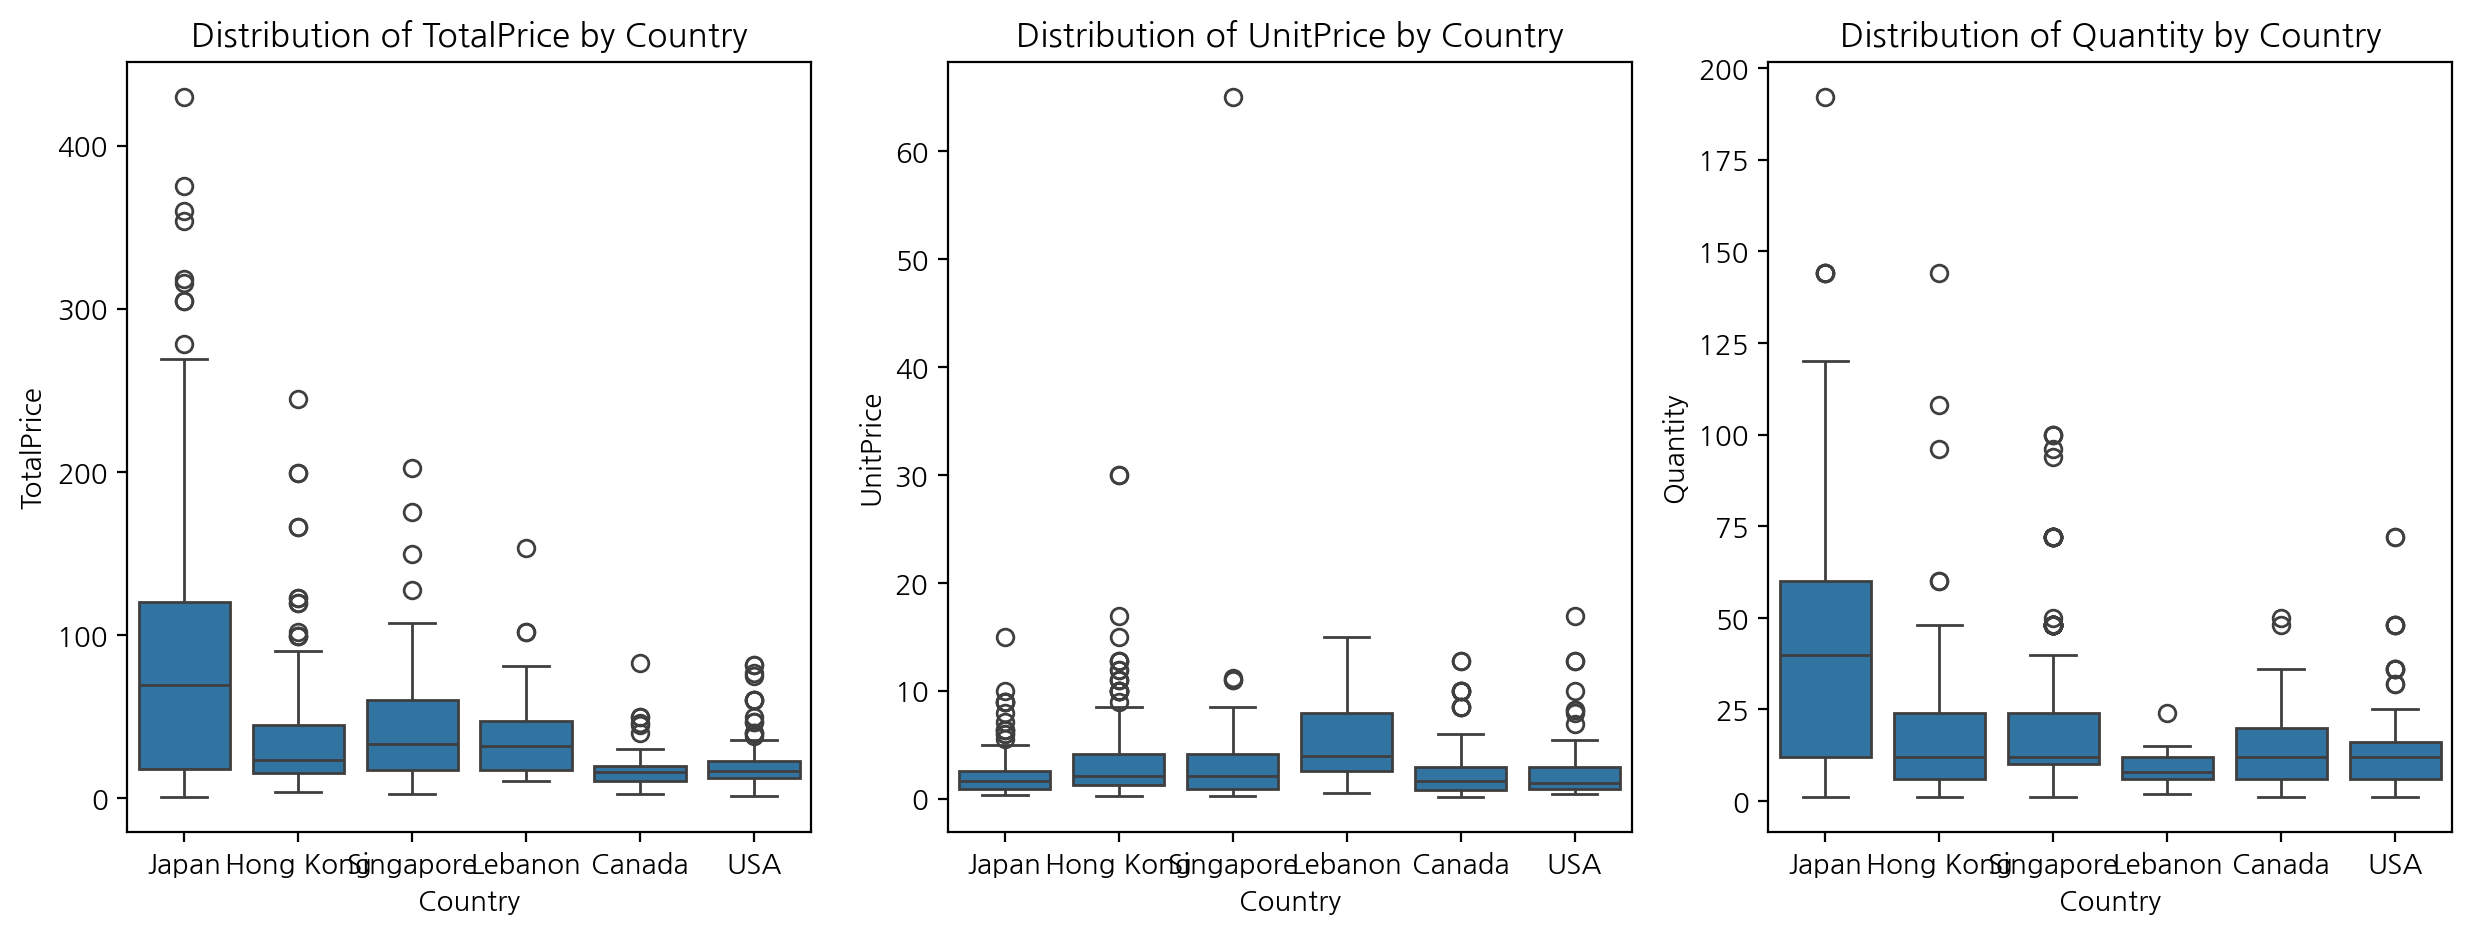

In [18]:
#Ïù¥ÏÉÅÏπò Ïû¨ÌôïÏù∏ (Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎãà Í∑∏ÎûòÌîÑÍ∞Ä Ï¢Ä Ïûò Î≥¥Ïù∏Îã§)

fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(data=country_sub, y='TotalPrice', x='Country', ax=axes[0])
axes[0].set_title('Distribution of TotalPrice by Country')
sns.boxplot(data=country_sub, y='UnitPrice', x='Country', ax=axes[1])
axes[1].set_title('Distribution of UnitPrice by Country')
sns.boxplot(data=country_sub, y='Quantity', x='Country', ax=axes[2])
axes[2].set_title('Distribution of Quantity by Country')

In [19]:
#Ïã¨Ïä®Ïó≠ÏÑ§ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú df_all Î≥ÄÏàò ÏûÑÏùò ÏÉùÏÑ±

country_all = df.copy()
country_all['Country'] = 'All'
df_all = pd.concat([country_all, country_sub])
df_all['Country'].value_counts()

All          530104
Japan           301
Hong Kong       280
Singapore       213
USA             179
Canada          148
Lebanon          45
Name: Country, dtype: int64

In [20]:
df_all = outlier_remove(df_all, 'TotalPrice')
df_all = outlier_remove(df_all, 'Quantity')
df_all = outlier_remove(df_all, 'UnitPrice')
df_all

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
524432    580553     20675                   BLUE POLKADOT BOWL        16   
524433    580553     20676                   RED RETROSPOT BOWL        16   
524434    580553     20975  12 PENCILS SMALL TUBE RED RETROSPOT        72   
524435    580553     22083            PAPER CHAIN KIT RETROSPOT        12   
524436    580553     21240                    BLUE POLKADOT CUP        16   

               InvoiceDate  UnitPrice  CustomerID Country  InvoiceMonth  \
0      2010-12-01 08:26:00       2.55     17850.0     All            12   
1      2010-12-01 08:26:00       3.39     17850.0     All            12   
2      2010-12-01 08:26:00       2.75     17850.0     All            12   
3      2010-12-01 08:26:00       3.39     17850.0     All            12   
4      2010-12-01 08:26:00       3.39     17850.0     All            12   
...                    ...        ...         ...     ...           ...   
524432 2011-12-05 10:14:00       1.25     12646.0     USA            12   
524433 2011-12-05 10:14:00       1.25     12646.0     USA            12   
524434 2011-12-05 10:14:00       0.65     12646.0     USA            12   
524435 2011-12-05 10:14:00       2.95     12646.0     USA            12   
524436 2011-12-05 10:14:00       0.85     12646.0     USA            12   

        TotalPrice  
0            15.30  
1            20.34  
2            22.00  
3            20.34  
4            20.34  
...            ...  
524432       20.00  
524433       20.00  
524434       46.80  
524435       35.40  
524436       13.60  

[523107 rows x 10 columns]

In [21]:
#Ï†úÏãúÎêú Íµ≠Í∞ÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
corr = country_sub.groupby('Country')[['Quantity', 'UnitPrice', 'TotalPrice']].corr(numeric_only=True)

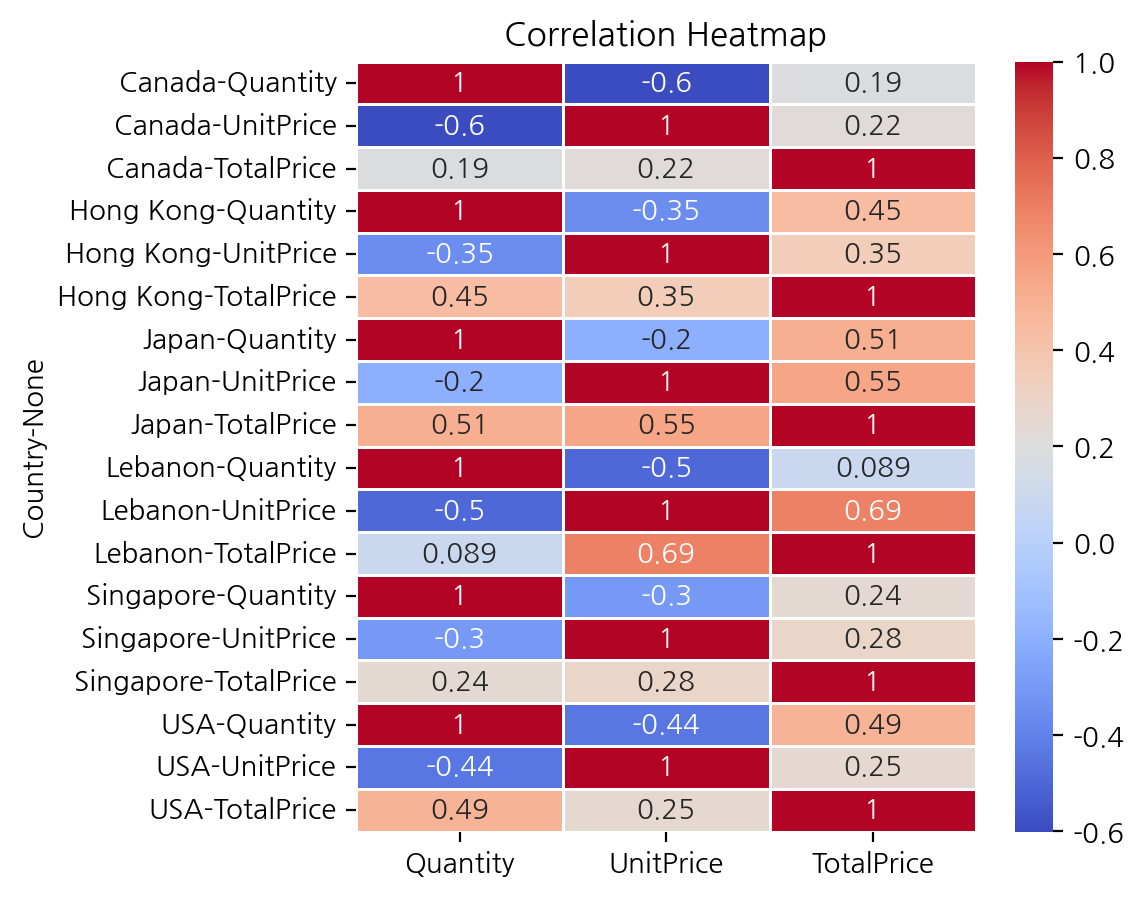

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', lw=0.5)
plt.title('Correlation Heatmap')
plt.show()

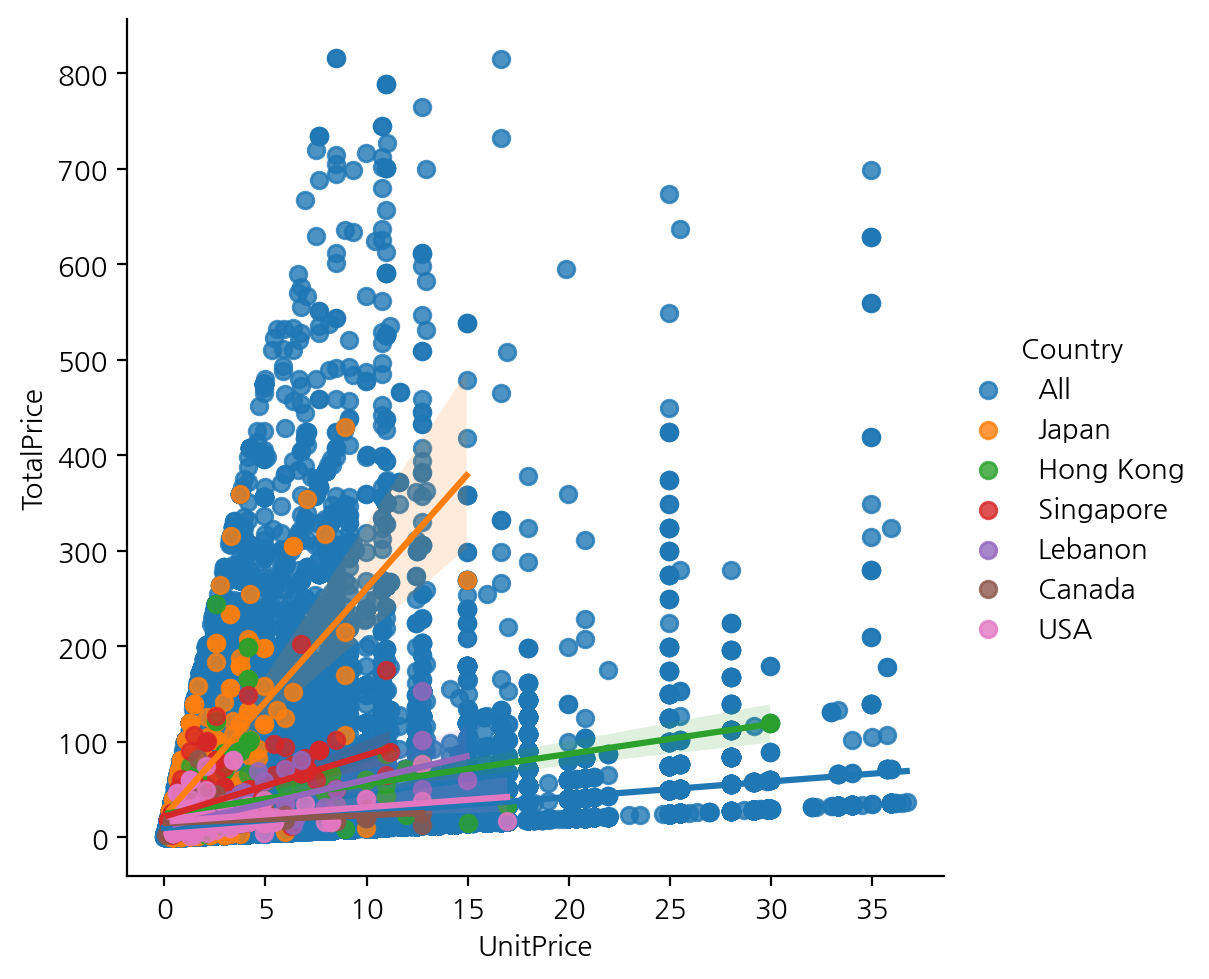

In [23]:
#Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑ, Ï†úÏãúÎêú Íµ≠Í∞ÄÎì§Ïùò Ïã¨Ïä®Ïùò Ïó≠ÏÑ§ (lmplot)
sns.lmplot(data=df_all, x='UnitPrice', y='TotalPrice', hue='Country')

## ÎØ∏ÏÖò2) ÏÉÅÌíàÏùò Îã®Í∞ÄÏôÄ Ï¥ù ÌåêÎß§Ïï°Ïùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï¥ Ï£ºÏÑ∏Ïöî.

ÏÉÅÌíàÏùò Îã®Í∞ÄÍ∞Ä Ï¥ù ÌåêÎß§Ïï°Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ïù¥Ìï¥ÌïòÍ≥† ÏòàÏ∏°ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Ïù¥ Î∂ÑÏÑùÏùÄ Í∞ÄÍ≤© Í≤∞Ï†ï Ï†ÑÎûµÏùÑ Í∞úÏÑ†ÌïòÍ≥†, ÏàòÏùµÏÑ±ÏùÑ ÏµúÎåÄÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©Îê† Ïàò ÏûàÏäµÎãàÎã§.
ÎÜíÏùÄ Îã®Í∞ÄÏùò ÏÉÅÌíàÏù¥ Îçî ÎßéÏùÄ Ï¥ù ÌåêÎß§Ïï°ÏùÑ ÏÉùÏÑ±Ìï† Í≤ÉÏù¥ÎùºÎäî Í∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.

1) Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨: ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï†ïÎ¶¨ÌïòÍ≥†, Í≤∞Ï∏°ÏπòÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.\
2) Îã®Ïàú ÌöåÍ∑ÄÎ∂ÑÏÑù: Îã®Í∞Ä(UnitPrice)Î•º ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú, Ï¥ù ÌåêÎß§Ïï°(TotalSales)ÏùÑ Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÏÑ§Ï†ïÌïòÏó¨ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.\
3) Í≤∞Í≥º Ìï¥ÏÑù: ÌöåÍ∑ÄÍ≥ÑÏàòÏôÄ Í≤∞Ï†ïÍ≥ÑÏàòÎ•º Î∂ÑÏÑùÌïòÏó¨ ÏÉÅÌíà Í∞ÄÍ≤©Í≥º Ï¥ù ÌåêÎß§Ïï° ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º Ìï¥ÏÑùÌï©ÎãàÎã§.

In [24]:
import statsmodels.api as sm
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÎòêÎäî ÎåÄÏ≤¥
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# Ï†ÑÏ≤¥Îç∞Ïù¥ÌÑ∞ Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
df = outlier_remove(df, 'TotalPrice')
df = outlier_remove(df, 'Quantity')
df = outlier_remove(df, 'UnitPrice')

# Îã®Ïàú ÌöåÍ∑ÄÎ∂ÑÏÑù
# ÎèÖÎ¶ΩÎ≥ÄÏàò: UnitPrice, Ï¢ÖÏÜçÎ≥ÄÏàò: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521969 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     521969 non-null  category      
 1   StockCode     521969 non-null  category      
 2   Description   521969 non-null  category      
 3   Quantity      521969 non-null  int32         
 4   InvoiceDate   521969 non-null  datetime64[ns]
 5   UnitPrice     521969 non-null  float64       
 6   CustomerID    390749 non-null  float32       
 7   Country       521969 non-null  object        
 8   InvoiceMonth  521969 non-null  int64         
 9   TotalPrice    521969 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.4+ MB


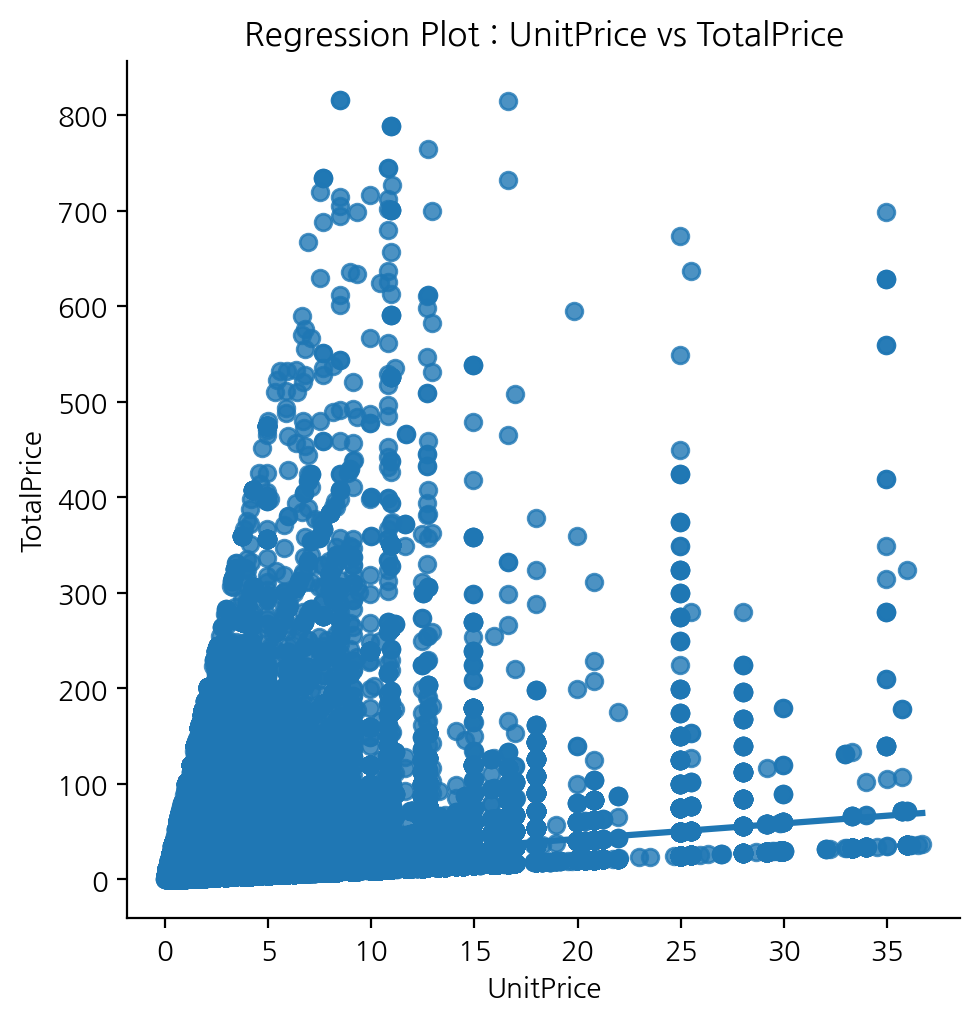

In [26]:
sns.lmplot(x='UnitPrice', y='TotalPrice', data=df)
plt.xlabel('UnitPrice')
plt.ylabel('TotalPrice')
plt.title('Regression Plot : UnitPrice vs TotalPrice')
plt.show()

In [27]:
import statsmodels.api as sm

#OLS Î™®Îç∏ ÌîºÌåÖ
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                 2.489e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:08   Log-Likelihood:            -2.4244e+06
No. Observations:              521969   AIC:                         4.849e+06
Df Residuals:                  521967   BIC:                         4.849e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0515      0.048    208.128      0.0

### üí°ÌöåÍ∑ÄÍ≥ÑÏàòÏôÄ Í≤∞Ï†ïÍ≥ÑÏàòÎ•º Î∂ÑÏÑùÌïòÏó¨ ÏÉÅÌíà Í∞ÄÍ≤©Í≥º Ï¥ù ÌåêÎß§Ïï° ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥Ñ Ìï¥ÏÑù
1. R-squared (Í≤∞Ï†ïÍ≥ÑÏàò): 0.031   (1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Ïûò ÏÑ§Î™ÖÌïúÎã§Îäî Îúª)  
Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞íÏúºÎ°ú, 0ÏóêÏÑú 1ÍπåÏßÄÏùò Î≤îÏúÑÎ•º Í∞ÄÏßÄÎ©∞, 0.031ÏùÄ ÏÑ§Î™ÖÎ†•Ïù¥ ÎÇÆÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.Îã®Ïàú ÌöåÍ∑Ä Î™®Îç∏Î°úÎäî Ï¥ù ÌåêÎß§Ïï°Ïùò Î≥ÄÎèôÏùÑ Ïûò ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌïúÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

2. ÌöåÍ∑ÄÍ≥ÑÏàò (coef):  
constÎäî ÏÉÅÏàòÌï≠ÏúºÎ°ú, Îã®Í∞ÄÍ∞Ä 0Ïùº ÎïåÏùò Ï¥ù ÌåêÎß§Ïï°Ïù¥Îã§. Ïó¨Í∏∞ÏÑúÎäî 12.7067Î°ú ÎÇòÌÉÄÎÇúÎã§.
UnitPriceÎäî Îã®Í∞ÄÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎ°ú, Îã®ÏúÑ Îã®Í∞ÄÍ∞Ä 1 Îã®ÏúÑ Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ Ï¥ù ÌåêÎß§Ïï°Ïù¥ ÏïΩ 4.3839 Îã®ÏúÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

3. P-value (P>|t|): 0~1ÏÇ¨Ïù¥  
constÏôÄ UnitPriceÏùò P-valueÎäî 0.000ÏúºÎ°ú Ïú†ÏùòÏàòÏ§Ä 0.05ÏóêÏÑú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§. Ï¶â, Îã®Í∞ÄÏôÄ Ï¥ù ÌåêÎß§Ïï° Í∞ÑÏùò Í¥ÄÍ≥ÑÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Ìï† Ïàò ÏûàÎã§. P valueÍ∞Ä ÏûëÏùÑÏàòÎ°ù Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎã§ (Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Îëê Î≥ÄÏàòÍ∞ÑÏóê Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§)

4. F-statistic: Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Î™®Îç∏Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Îäî Îúª  
F-ÌÜµÍ≥ÑÎüâÏùÄ ÌöåÍ∑ÄÎ™®Îç∏Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§Îäî Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïóê ÎåÄÌïú Í≤ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. Ïó¨Í∏∞ÏÑúÎäî 269.7Î°ú ÎÇòÌÉÄÎÇòÎ©∞, Ïù¥Îäî Î™®Îç∏Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
  
Í≤∞Í≥ºÏ†ÅÏúºÎ°ú, Îã®Í∞Ä(UnitPrice)ÏôÄ Ï¥ù ÌåêÎß§Ïï°(TotalPrice) ÏÇ¨Ïù¥ÏóêÎäî ÏñëÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎ©∞, Îã®Í∞ÄÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Ï¥ù ÌåêÎß§Ïï°ÎèÑ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. Í∑∏Îü¨ÎÇò Í≤∞Ï†ïÍ≥ÑÏàòÍ∞Ä ÎÇÆÏïÑÏÑú Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌïúÎã§Îäî Ï†êÏóê Ï£ºÏùòÌï¥Ïïº ÌïúÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ Î≥ÄÏàòÎÇò Î™®Îç∏ Í∞úÏÑ†ÏùÑ ÌÜµÌï¥ ÏÑ§Î™ÖÎ†•ÏùÑ ÎÜíÏùº Ïàò ÏûàÎäîÏßÄ Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§.






## ÎØ∏ÏÖò3) Ïó¨Îü¨ Î∂ÑÏùÄ ÌÅ¨Î¶¨Ïä§ÎßàÏä§Í∞Ä Ïò®ÎùºÏù∏ ÏÜåÎß§ ÌåêÎß§Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥†, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú Îçî Ìö®Í≥ºÏ†ÅÏù∏ Í∞ÄÍ≤© Î∞è ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÎûµÏùÑ Í∞úÎ∞úÌï¥Ïïº Ìï©ÎãàÎã§.  

* Îã§ÏùåÍ≥º Í∞ôÏùÄ ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏùÑ Í≥†Î†§ÌïòÏó¨ Ïù∏Í≥º Î∂ÑÏÑùÏùÑ Ìï©ÎãàÎã§. Ï¶ùÍ±∞Ïùò ÏÇ¨Îã§Î¶¨Î°ú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏñªÏùÑ Ïàò ÏûàÎäî Ï¶ùÍ±∞Ïùò Í∞ïÎèÑÎ•º ÌèâÍ∞ÄÌï©ÎãàÎã§. ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í¥ÄÎ†® ÏÉÅÌíàÍ≥º ÎπÑÍ¥ÄÎ†® ÏÉÅÌíà Í∞ÑÏùò ÌåêÎß§ Ï∞®Ïù¥Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.


* ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÎûµ
    * ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏÉÅÌíà ÌîÑÎ°úÎ™®ÏÖò Í∞ïÌôîÌïòÏó¨ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í¥ÄÎ†® ÏÉÅÌíàÏùò ÌåêÎß§Î•º Ï¶ùÏßÑÏãúÌÇ§Í∏∞ ÏúÑÌïú ÌäπÎ≥Ñ ÌîÑÎ°úÎ™®ÏÖòÏùÑ Í∞úÎ∞úÌï©ÎãàÎã§.
    * ÎåÄÏÉÅ Í≥†Í∞ùÏùÑ ÏÑ∏Î∂ÑÌôîÌïòÏó¨ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏÉÅÌíàÏóê Í¥ÄÏã¨Ïù¥ ÎÜíÏùÄ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î•º ÏãùÎ≥ÑÌïòÍ≥†, Ïù¥Îì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏ÏùÑ Ïã§ÌñâÌï©ÎãàÎã§.
* Ïû¨Í≥† Î∞è Í≥µÍ∏âÎßù Í¥ÄÎ¶¨
    * Ïû¨Í≥† ÏµúÏ†ÅÌôîÎ•º ÌÜµÌï¥ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóê ÎåÄÌïú ÏàòÏöî ÏòàÏ∏°ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïû¨Í≥† ÏàòÏ§ÄÏùÑ Ï°∞Ï†àÌï©ÎãàÎã§.
    * Í≥µÍ∏âÎßù Ìö®Ïú®ÌôîÎ•º ÌÜµÌï¥ ÏãúÏ¶åÎ≥Ñ ÏàòÏöî Î≥ÄÌôîÏóê Îî∞Îùº Í≥µÍ∏âÎßùÏùÑ Ï°∞Ï†ïÌïòÏó¨ ÎπÑÏö©ÏùÑ ÏµúÏÜåÌôîÌïòÍ≥†, Í≥†Í∞ù ÎßåÏ°±ÎèÑÎ•º ÎÜíÏûÖÎãàÎã§.
* ÏÉÅÌíà Îã§ÏñëÌôî
    * ÏÉÅÌíà Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º ÌôïÏû•ÌïòÏó¨ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í¥ÄÎ†® ÏÉÅÌíàÎøêÎßå ÏïÑÎãàÎùº, Îã§Î•∏ ÏãúÏ¶å ÏÉÅÌíàÏóêÎèÑ Ï£ºÎ™©ÌïòÏó¨ ÏÉÅÌíà Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Î•º Îã§ÏñëÌôîÌï©ÎãàÎã§

* ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶å ÎèôÏïà ÌîÑÎ°úÎ™®ÏÖòÍ≥º ÏÉÅÌíà Í∞ÄÍ≤© Ï†ÑÎûµÏù¥ ÌåêÎß§Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Î∂ÑÏÑùÌïòÏó¨, ÎØ∏ÎûòÏùò ÌîÑÎ°úÎ™®ÏÖò Î∞è Í∞ÄÍ≤© Ï†ÑÎûµÏùÑ ÏµúÏ†ÅÌôîÌï¥Ïïº Ìï©ÎãàÎã§.



* Îã§Ïùå Ï£ºÏñ¥ÏßÑ ÏΩîÎìúÎ•º ÌôúÏö©Ìï©ÎãàÎã§.


```python
# 2011ÎÖÑ Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# ÌîÑÎ°úÎ™®ÏÖò Ïó¨Î∂ÄÏôÄ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [28]:
# 2011ÎÖÑ Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# ÌîÑÎ°úÎ™®ÏÖò Ïó¨Î∂ÄÏôÄ ÏãúÍ∞ÑÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] <= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [29]:
df_promotion

InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
42448    539988     84380    SET OF 3 BUTTERFLY COOKIE CUTTERS         1   
42449    539988    84849D                HOT BATHS SOAP HOLDER         1   
42450    539988    84849B               FAIRY SOAP SOAP HOLDER         1   
42451    539988     22854          CREAM SWEETHEART EGG HOLDER         2   
42452    539988    47559B                  TEA TIME OVEN GLOVE         2   

              InvoiceDate  UnitPrice  CustomerID         Country  \
0     2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2     2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4     2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                   ...        ...         ...             ...   
42448 2010-12-23 16:06:00       1.25     18116.0  United Kingdom   
42449 2010-12-23 16:06:00       1.69     18116.0  United Kingdom   
42450 2010-12-23 16:06:00       1.69     18116.0  United Kingdom   
42451 2010-12-23 16:06:00       4.95     18116.0  United Kingdom   
42452 2010-12-23 16:06:00       1.25     18116.0  United Kingdom   

       InvoiceMonth  TotalPrice  IsChristmasPeriod  IsChristmasProduct  
0                12       15.30               True               False  
1                12       20.34               True               False  
2                12       22.00               True               False  
3                12       20.34               True               False  
4                12       20.34               True               False  
...             ...         ...                ...                 ...  
42448            12        1.25               True               False  
42449            12        1.69               True               False  
42450            12        1.69               True               False  
42451            12        9.90               True               False  
42452            12        2.50               True               False  

[25748 rows x 12 columns]

In [30]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 0 to 42452
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           25748 non-null  category      
 1   StockCode           25748 non-null  category      
 2   Description         25748 non-null  category      
 3   Quantity            25748 non-null  int32         
 4   InvoiceDate         25748 non-null  datetime64[ns]
 5   UnitPrice           25748 non-null  float64       
 6   CustomerID          25748 non-null  float32       
 7   Country             25748 non-null  object        
 8   InvoiceMonth        25748 non-null  int64         
 9   TotalPrice          25748 non-null  float64       
 10  IsChristmasPeriod   25748 non-null  bool          
 11  IsChristmasProduct  25748 non-null  bool          
dtypes: bool(2), category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memo

In [49]:
#ÎåÄÏÉÅ Í≥†Í∞ùÏùÑ ÏÑ∏Î∂ÑÌôîÌïòÏó¨ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏÉÅÌíàÏóê Í¥ÄÏã¨Ïù¥ ÎÜíÏùÄ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏Î•º ÏãùÎ≥ÑÌïòÍ≥†, Ïù¥Îì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ìïú ÎßàÏºÄÌåÖ Ï∫†ÌéòÏù∏ÏùÑ Ïã§ÌñâÌï©ÎãàÎã§.
#ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏÉÅÌíà Íµ¨Îß§Ïù¥Î†• ÏûàÎäî Í≥†Í∞ùÎì§
#Í¥ÄÏã¨Ïù¥ Ïú†ÎèÖ ÎÜíÏùÄ Í≥†Í∞ùÎì§ ÏãùÎ≥Ñ (50% Íµ¨Í∞ÑÏù∏ 2Í∞ú Ï¥àÍ≥º Íµ¨Îß§ Í≥†Í∞ùÎì§ÏùÑ Í¥ÄÏã¨ ÎßéÏùÄ Í≥†Í∞ùÍµ∞ÏúºÎ°ú Î∂ÑÎ•ò)
Christmas_group = df_promotion[df_promotion['IsChristmasProduct']==True].groupby(['CustomerID'])['IsChristmasProduct'].count()
interested_customers = Christmas_group[Christmas_group > 2]

In [50]:
Christmas_group.describe()

count    375.000000
mean       4.234667
std        5.139068
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       42.000000
Name: IsChristmasProduct, dtype: float64

In [34]:
interested_customers

CustomerID
12441.0     3
12472.0    20
12577.0     5
12748.0    42
12838.0    13
           ..
18041.0    17
18077.0     6
18118.0     7
18119.0     3
18239.0    11
Name: IsChristmasProduct, Length: 183, dtype: int64

<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

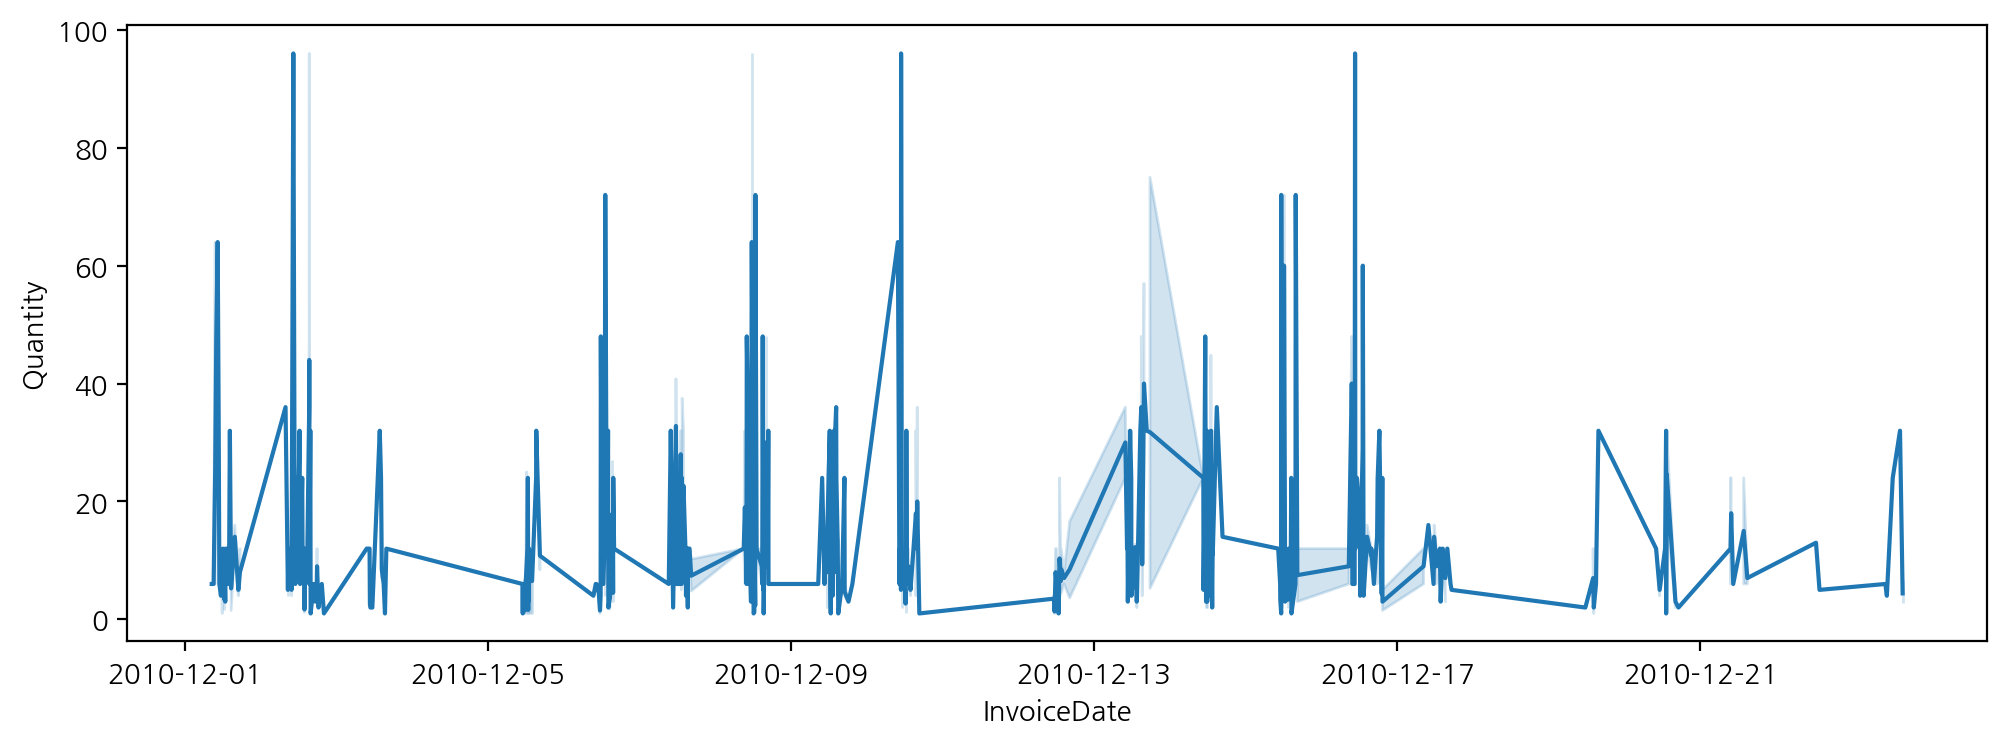

In [55]:
#ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶åÏóê ÎåÄÌïú ÏàòÏöî ÏòàÏ∏°ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïû¨Í≥† ÏàòÏ§ÄÏùÑ Ï°∞Ï†àÌï©ÎãàÎã§. ÏãúÏ¶åÎ≥Ñ ÏàòÏöî Î≥ÄÌôîÏóê Îî∞Îùº Í≥µÍ∏âÎßùÏùÑ Ï°∞Ï†ïÌïòÏó¨ ÎπÑÏö©ÏùÑ ÏµúÏÜåÌôîÌïòÍ≥†, Í≥†Í∞ù ÎßåÏ°±ÎèÑÎ•º ÎÜíÏûÖÎãàÎã§.

plt.figure(figsize=(12,4))
sns.lineplot(x='InvoiceDate', y='Quantity', data=df_promotion)

In [60]:
#ÏòÅÍµ≠Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÏàòÎüâÏùÑ ÎßéÏù¥ ÏÉÄÎã§

df_promotion.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom     193801
Germany              6777
France               4672
EIRE                 3796
Norway               3582
Japan                2505
Netherlands          1391
Belgium              1295
Portugal              984
Cyprus                917
Switzerland           712
Spain                 667
Lithuania             652
Finland               480
Australia             347
Denmark               334
Iceland               319
Italy                 295
Poland                140
Sweden                 90
Channel Islands        79
Austria                48
Name: Quantity, dtype: int32

## ÎØ∏ÏÖò4) Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌïòÏó¨ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í∏∞Í∞Ñ Ï†ÑÌõÑÏôÄ ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í¥ÄÎ†® ÏÉÅÌíàÍ≥º ÎπÑÍ¥ÄÎ†® ÏÉÅÌíà Í∞ÑÏùò ÌåêÎß§Îüâ(Quantity) Ï∞®Ïù¥Î•º 'UnitPrice'ÏôÄ 'Country'ÏôÄ Ìï®Íªò Î∂ÑÏÑùÌï©ÎãàÎã§.

* ÌåêÎß§Îüâ(Quantity)ÏùÑ Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú ÌïòÏó¨, ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í¥ÄÎ†® ÏÉÅÌíà Ïó¨Î∂Ä(IsChristmasProduct), Îã®Í∞Ä(UnitPrice), Íµ≠Í∞Ä(Country) Îì±ÏùÑ ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú Ìè¨Ìï®ÌïòÎäî Îã§Î≥ÄÎüâ ÏÑ†Ìòï ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï©ÎãàÎã§.
* statsmodels ÎùºÏù¥Î∏åÎü¨Î¶¨(statsmodels.formula.api Ïùò ols)Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÍ≥†, Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌï©ÎãàÎã§.
* Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ìï¥ÏÑùÌïòÍ≥†, Ïù¥Î•º Î∞îÌÉïÏúºÎ°ú ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÏãúÏ¶å ÌåêÎß§ Ï†ÑÎûµÏóê ÎåÄÌïú Í∂åÏû• ÏÇ¨Ìï≠ÏùÑ Ï†úÏãúÌï©ÎãàÎã§.
* Î∂ÑÏÑù Í≥ºÏ†ïÍ≥º Í≤∞Í≥º, Í∑∏Î¶¨Í≥† ÎπÑÏ¶àÎãàÏä§ Ï†ÑÎûµÏóê ÎåÄÌïú Í∂åÏû• ÏÇ¨Ìï≠ÏùÑ Ìè¨Ìï®ÌïòÎäî Î≥¥Í≥†ÏÑúÎ•º ÏûëÏÑ±Ìï©ÎãàÎã§.
* Îã§Ïùå Ï£ºÏñ¥ÏßÑ ÏΩîÎìúÎ•º ÌôúÏö©Ìï©ÎãàÎã§.

```python
import statsmodels.formula.api as smf
```

In [37]:
import statsmodels.formula.api as smf

In [38]:
# Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù

model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country + IsChristmasPeriod', data=df_promotion)

# Î™®Îç∏ Ï†ÅÌï©
result = model.fit()

# ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º Ï∂úÎ†•
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:09   Log-Likelihood:                -99715.
No. Observations:               25748   AIC:                         1.995e+05
Df Residuals:                   25724   BIC:                         1.997e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Îã§Î≥ÄÎüâ ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º Ìï¥ÏÑù Î∞è ÌåêÎß§ Ï†ÑÎûµ Í∂åÏû• ÏÇ¨Ìï≠
1. Î™®Îç∏ ÏöîÏïΩ: Ï¢ÖÏÜçÎ≥ÄÏàò (Dependent Variable): Quantity, ÎèÖÎ¶ΩÎ≥ÄÏàò (Independent Variables): IsChristmasProduct, Country, IsChristmasPeriod, UnitPrice  

2. Î™®Îç∏ Ìï¥ÏÑù:  
R-squared: 0.103Î°ú, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏïΩ 10.3% Ï†ïÎèÑ ÏÑ§Î™ÖÌï®  
p-value = 0.074 : ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÏôÄ Í¥ÄÎ†®Îêú ÏÉÅÌíàÏù¥ ÌåêÎß§ÎüâÏóê Ïñ¥Îäê Ï†ïÎèÑ ÏñëÏùò ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏùå  
UnitPrice: coef = -1.0121, p-value < 0.001 : Ï†úÌíà Í∞ÄÍ≤©Ïù¥ Ïò¨ÎùºÍ∞àÏàòÎ°ù ÌèâÍ∑†Ï†ÅÏù∏ ÌåêÎß§ÎüâÏùÄ 1.0121Ïî© Í∞êÏÜåÌï® (p-value < 0.001Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏)  

3. Í∂åÏû• ÏÇ¨Ìï≠:
* ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÏôÄ Í¥ÄÎ†®Îêú ÏÉÅÌíàÏùÄ ÌåêÎß§ÎüâÏóê Ïñ¥Îäê Ï†ïÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏùå. ÌÅ¨Î¶¨Ïä§ÎßàÏä§ ÌÖåÎßàÏùò ÎßàÏºÄÌåÖ Î∞è ÌäπÎ≥ÑÌïú ÌîÑÎ°úÎ™®ÏÖòÏùÑ ÌÜµÌï¥ Ïù¥Îü¨Ìïú ÏÉÅÌíàÏùÑ Í∞ïÌôîÌïòÎ©¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÏàòÏùµ Í∏∞ÌöåÍ∞Ä ÏûàÏùÑ Í≤É.

* Íµ≠Í∞Ä Î≥ÄÏàòÎì§Ïù¥ ÌåêÎß§ÎüâÏóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®. ÌäπÏ†ï Íµ≠Í∞ÄÏóêÏÑúÏùò ÏàòÏöîÍ∞Ä ÎÜíÏúºÎØÄÎ°ú Ìï¥Îãπ Íµ≠Í∞ÄÏóê ÎßûÎäî ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÎèÑÏûÖ. (ÌïÄÎûÄÎìú, ÏùºÎ≥∏, ÎÑ§ÎçúÎûÄÎìú, ÎÖ∏Î•¥Ïõ®Ïù¥ Îì± p valueÎäî ÎÇÆÍ≥†, ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÎÜíÏùÄ Íµ≠Í∞ÄÎì§ Í≥µÎûµ)

* ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í∏∞Í∞Ñ Í∞ïÌôî: ÌÅ¨Î¶¨Ïä§ÎßàÏä§ Í∏∞Í∞ÑÏóêÎäî ÌåêÎß§ÎüâÏù¥ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏúºÎØÄÎ°ú, Ïù¥ Í∏∞Í∞ÑÏóê ÎßûÏ∂ò ÎßàÏºÄÌåÖ Î∞è ÌîÑÎ°úÎ™®ÏÖò Í∞ïÌôî ÌïÑÏöî.

* Í∞ÄÍ≤© Ï°∞Ï†ï Ï†ÑÎûµ: Ï†úÌíà Í∞ÄÍ≤©Ïù¥ ÌèâÍ∑† ÌåêÎß§ÎüâÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®. Í∞ÄÍ≤© Ìï†Ïù∏Ïù¥ÎÇò Í∞ÄÍ≤© Ï°∞Ï†ï Ï†ÑÎûµÏùÑ ÌÜµÌï¥ Í≥†Í∞ù Ïú†Ïπò Î∞è ÌåêÎß§Îüâ Ï¶ùÎåÄÎ•º Í≥†Î†§.

* ÏÉÅÌíà Îã§ÏñëÌôî: ÌäπÌûà ÌåêÎß§ÎüâÏù¥ ÎÇÆÏùÄ Íµ≠Í∞ÄÎÇò ÌÅ¨Î¶¨Ïä§ÎßàÏä§ÏôÄ Í¥ÄÎ†®Ïù¥ Ï†ÅÏùÄ ÏÉÅÌíàÏùò Îã§ÏñëÏÑ±ÏùÑ ÎÜíÏó¨ ÏÉàÎ°úÏö¥ Í≥†Í∞ùÏ∏µÏùÑ Ïú†Ïπò.

## ÎØ∏ÏÖò5) Ïò®ÎùºÏù∏ ÏÜåÎß§ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥†Í∞ùÏù¥ ÌäπÏ†ï ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìï†ÏßÄ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°Ìï©ÎãàÎã§.
Ïù¥ ÏòàÏ∏° Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÉÄÍ≤ü ÎßàÏºÄÌåÖ Ï†ÑÎûµÏùÑ ÏàòÎ¶ΩÌïòÍ≥†, Ïû¨Í≥† Í¥ÄÎ¶¨Î•º ÏµúÏ†ÅÌôîÌï©ÎãàÎã§. Í≥†Í∞ùÏùò ÌäπÏ†ï ÏÉÅÌíà Íµ¨Îß§ Ïó¨Î∂Ä(Íµ¨Îß§/ÎØ∏Íµ¨Îß§)Î•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌï©ÎãàÎã§.


1) ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ±: 'WHITE HANGING HEART T-LIGHT HOLDER' ÏÉÅÌíàÏùÑ Íµ¨Îß§ÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Ïù¥ÏßÑ ÌÉÄÍ≤ü Î≥ÄÏàò(0: ÎØ∏Íµ¨Îß§, 1: Íµ¨Îß§)Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.\
2) ÌäπÏÑ±(feature) ÏÑ†ÌÉù: Íµ¨Îß§ ÏòàÏ∏°Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÑ ÏÑ†ÌÉùÌï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' Îì±Ïù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.\
3) Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨: 'Country'ÏôÄ Í∞ôÏùÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§. Ïõê-Ìï´ Ïù∏ÏΩîÎî©ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.\
4) Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†: Î™®Îç∏ ÌïôÏäµÏùÑ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†Ìï©ÎãàÎã§.\
5) Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµÌï©ÎãàÎã§.\
6) Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Ìï©ÎãàÎã§.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' ÏÉÅÌíà Íµ¨Îß§ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉùÏÑ±
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6501
True     1990
Name: Target, dtype: int64

In [40]:
# ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î≥ÄÏàò Î∂ÑÎ¶¨
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report: ')
print(classification_report(y_test, y_pred))

Confusion Matrix: 
[[1169  129]
 [ 360   41]]

Classification Report: 
              precision    recall  f1-score   support

       False       0.76      0.90      0.83      1298
        True       0.24      0.10      0.14       401

    accuracy                           0.71      1699
   macro avg       0.50      0.50      0.49      1699
weighted avg       0.64      0.71      0.67      1699



## üí°Ìï¥ÏÑù
* accuracy : 0.71 (Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎäî 71% Ï†ïÎèÑÎã§)    
* precision : 0.24 (ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìïú Í≤ÉÏúºÎ°ú ÏòàÏ∏° Ïãú Ïã§Ï†ú Íµ¨Îß§Ìïú ÎπÑÏú®Ïù¥Î©∞, 24%Î°ú ÎÇÆÏùÄ Ìé∏)  
* recall : 0.1 (Ïû¨ÌòÑÏú®. Ïã§Ï†ú Íµ¨Îß§Ìïú Í≤ΩÏö∞ Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌñàÎäîÏßÄ ÎÇòÌÉÄÎÇ¥Î©∞, 10%Î°ú ÎÇÆÏùå)  
* F1-score : Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïùò Ï°∞ÌôîÌèâÍ∑†ÏúºÎ°ú, ÏÉÅÌíàÏùÑ Íµ¨Îß§Ìïú Í≤ΩÏö∞Ïùò F1Ïù¥ ÎÇÆÍ≤å ÎÇòÏò®Îã§ (14%)

Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ï†ïÌôïÎèÑÎäî ÎÜíÏúºÎÇò, ÏÉÅÌíàÏùÑ Íµ¨Îß§ Ïãú Ï†úÎåÄÎ°ú ÏòàÏ∏° Î™ªÌïòÍ≥† ÏûàÎã§.
